# Webscraper for Historical and Current Games


Basic installing of packages for the selenium webdriver.

In [ ]:
# Google Colab setup for Selenium + Headless Chrome
!apt-get update -qq
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install -q selenium


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


This is the webscraper that gets the basic data from barttorvik and puts it into two seperate csv files.

In [ ]:
import time
import io
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Historical URLs (2023-2024)
historical_urls = [
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=0&quad=1",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
]

# 2025 URLs
current_urls = [
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=1",
]

# Function to scrape game data from BartTorvik.com
def scrape_urls(urls, output_filename):
    dfs_all = []

    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    driver = webdriver.Chrome(options=chrome_options)

    for url in urls:
        print(f"Scraping: {url}")
        driver.get(url)
        time.sleep(5)
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        tables = soup.find_all("table")
        print(f"  Found {len(tables)} table(s).")

        if len(tables) >= 2:
            tbl_html = str(tables[1])
            df_list = pd.read_html(io.StringIO(tbl_html))
            if df_list:
                df_second = df_list[0]
                dfs_all.append(df_second)
                print(f"  Successfully parsed the second table (shape: {df_second.shape})")
            else:
                print("  Could not parse the second table with pd.read_html.")
        else:
            print("  There's no second table on this page.")

    driver.quit()

    if dfs_all:
        df_combined = pd.concat(dfs_all, ignore_index=True)
        df_combined.to_csv(output_filename, index=False)
        print(f"\nSaved all second tables to '{output_filename}' (total rows: {len(df_combined)})")
        return df_combined
    else:
        print(f"\nNo data frames were found; no CSV file was created for {output_filename}.")
        return None

# Run the scrapers
print("\n=== SCRAPING HISTORICAL DATA (2023-2024) ===")
historical_df = scrape_urls(historical_urls, "historical_games.csv")

print("\n=== SCRAPING CURRENT SEASON DATA (2025) ===")
current_df = scrape_urls(current_urls, "2025_games.csv")



=== SCRAPING HISTORICAL DATA (2023-2024) ===
Scraping: https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=0&quad=1
  Found 2 table(s).
  Successfully parsed the second table (shape: (1945, 25))
Scraping: https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&

# Add Home Court Advantage Into Dataset


In [ ]:
historical_df = pd.read_csv("historical_games.csv")
current_df = pd.read_csv("2025_games.csv")
url="https://www.boydsbets.com/college-basketball-home-court-advantage/"
def scrape_home_court_advantage():
  chrome_options = Options()
  chrome_options.add_argument("--headless")
  chrome_options.add_argument("--no-sandbox")
  chrome_options.add_argument("--disable-dev-shm-usage")
  driver = webdriver.Chrome(options=chrome_options)
  print(f"Scraping: {url}")
  driver.get(url)
  time.sleep(3)
  html = driver.page_source
  soup = BeautifulSoup(html, "html.parser")
  tables = soup.find_all("table")
  print(f"  Found {len(tables)} table(s).")
  table=str(tables[0])

  homecourt_ad_df = pd.read_html(io.StringIO(table))[0]
  homecourt_ad_df.dropna(inplace=True)
  homecourt_ad_df.to_csv("homecourt_advantage.csv", index=False)
  driver.quit()
  return homecourt_ad_df

temp_hc_ad_df=scrape_home_court_advantage()


Scraping: https://www.boydsbets.com/college-basketball-home-court-advantage/
  Found 1 table(s).


We now have 3 data frames that need to be put together and cleaned. We will focus on historical data for the statistical analysis portion then leave the current year games for our testing data of our machine learning model.

# Basic Data Cleaning

Making the columns of our historical dataframe correct and dropping some uncessisary columns and rows.

In [ ]:
historical_df.columns = historical_df.iloc[0]
historical_df.drop(historical_df.head(1).index,inplace=True)
historical_df.drop(historical_df.tail(1).index,inplace=True)
historical_df.drop(historical_df.columns[-1],inplace=True,axis=1)
historical_df.drop(historical_df.columns[0],inplace=True, axis=1)

Merging in the home court advantage. Alot of the names between the two dataframes need to be slightly adjusted for the merge to work. Then any NaN values that are still not there will just be dropped from the DataFrame.

In [ ]:
import numpy as np


name_changes={
    "NC State": "N.C. State",
    "Indiana St": "Indiana St.",
    "San Diego St": "San Diego St.",
    "Mississippi St": "Mississippi St.",
    "North Carolina St": "North Carolina St.",
    "Penn St": "Penn St.",
    "Ohio St": "Ohio St.",
    "Ohio State": "Ohio St.",
    "Iowa St": "Iowa St.",
    "Boise St": "Boise St.",
    "Fresno St": "Fresno St.",
    "Arizona St": "Arizona St.",
    "Texas AM": "Texas A&M",
    "Utah St": "Utah St.",
    "Texas St": "Texas St.",
    "Michigan St": "Michigan St.",
    "Washington St": "Washington St.",
    "Kansas St": "Kansas St.",
    "Miami Florida": "Miami FL",
    "Texas Christian": "TCU",
    "Northwestern St": "Northwestern St.",
    "McNeese St": "McNeese St.",
    "Morehead St": "Morehead St.",
    "Wisconsin St": "Wisconsin St.",
    "South Dakota State": "South Dakota St.",
    "Colorado St": "Colorado St.",
    "Long Beach St": "Long Beach St.",
    "Brigham Young": "BYU",
    "Florida St": "Florida St.",
    "Louisiana State": "LSU",
    "Southern California": "USC",
    "Central Florida": "UCF",
    "Louisiana Tech": "UT",
    "Missouri St": "Missouri St.",
    "Alabama St": "Alabama St.",
    "Oklahoma St": "Oklahoma St.",
    "Citadel": "The Citadel",
    "Arkansas St": "Arkansas St.",
    "Murray St": "Murray St.",
    "Southern Methodist": "SMU",
    "St Johns": "St. John's",
    "San Jose St": "San Jose St.",
    "Pennsylvania": "Penn",
    "St Bonaventure": "St. Bonaventure",
    "Oregon St": "Oregon St.",
    "Wichita St": "Wichita St.",
}

temp_hc_ad_df['Team']=temp_hc_ad_df['Team'].replace(name_changes)
historical_df = historical_df.merge(temp_hc_ad_df[['Team','True Advantage']], on='Team', how='left')
nan_rows = historical_df[historical_df['True Advantage'].isna()]
historical_df.dropna(subset=['True Advantage'],inplace=True)


display(historical_df)

,Rk,Date,Type,Team,Conf.,Opp.,Venue,Result,Adj. O,Adj. D,...,Reb%,FTR,EFF,eFG%,TO%,Reb%,FTR,G-Sc,+/-,True Advantage
0,1,4/8/24,T,Connecticut,BE,Purdue,N,"W, 75-60",135,83.5,...,42.4,17.7,98.1,45.4,14.7,30,27.8,99.6,7,3.86
1,2,4/8/24,T,Purdue,B10,Connecticut,N,"L, 75-60",115.3,99.6,...,30,27.8,122.6,53.2,13.1,42.4,17.7,84.3,-7,4.54
2,3,4/6/24,T,Alabama,SEC,Connecticut,N,"L, 86-72",136.3,109.8,...,24.2,19,136.8,58.1,6.4,36.4,29,92.3,-4,4.86
3,4,4/6/24,T,Connecticut,BE,Alabama,N,"W, 86-72",137.2,98.7,...,36.4,29,114.5,54.3,12.7,24.2,19,97.8,4,3.86
4,5,4/6/24,T,N.C. State,ACC,Purdue,N,"L, 63-50",87,81.8,...,16.7,7,97.9,49.1,24.9,33.3,18.2,66.9,-8,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,96,2/23/23,C,Eastern Washington,BSky,Weber St.,A,"W, 89-82",137.8,129.2,...,28.6,43.4,123,52.5,15,37.1,40.7,67.7,2,3.94
9847,97,2/8/23,C,Alabama,SEC,Florida,H,"W, 97-69",137.8,90.9,...,30,20.5,91.5,38.1,13.3,28.3,49.2,99.2,18,4.86
9848,98,11/26/22,N,Boise St.,MWC,Utah Valley,H,"W, 87-69",137.8,99.3,...,31.2,24.6,100.7,48.2,14.6,23.5,35.7,97.7,11,3.59
9849,99,2/2/23,C,Arizona,P12,Oregon,H,"W, 91-76",137.7,99.7,...,34.5,37.9,107.8,48.4,17,30.8,28.6,97.6,11,3.51


Now we have a set of duplicated columns with the first relating to offense statistics and the latter being defensive so let us show reflect this into our dataframe for later use. Additionally, we updated the true advantage column to show 0 unless the venue is Home "H".

In [ ]:
historical_df.columns=['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'o_EFF', 'o_eFG%', 'o_TO%', 'o_Reb%', 'o_FTR', 'd_EFF',
       'd_eFG%', 'd_TO%', 'd_Reb%', 'd_FTR', 'G-Sc', '+/-', 'True Advantage']

historical_df.loc[historical_df['Venue'].str.upper() != 'H', 'True Advantage'] = 0


display(historical_df.columns)

Index(['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'o_EFF', 'o_eFG%', 'o_TO%', 'o_Reb%', 'o_FTR',
       'd_EFF', 'd_eFG%', 'd_TO%', 'd_Reb%', 'd_FTR', 'G-Sc', '+/-',
       'True Advantage'],
      dtype='object')

Now lets make a score column so the team can have a score instead of just a scorebox.

In [ ]:
historical_df['Won/Loss']=historical_df['Result'].str[0]
temp=historical_df["Result"].str.split(', ', expand=True)
historical_df["Score Range"]=temp[1]
temp2=historical_df["Score Range"].str.split('-', expand=True).astype(int)
def score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return max(s1,s2)
  else:
    return min(s1,s2)
def opp_score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return min(s1,s2)
  else:
    return max(s1,s2)
historical_df['Score']=historical_df.apply(score_fun,axis=1)
historical_df['Opp_Score']=historical_df.apply(opp_score_fun,axis=1)

display(historical_df)
display(historical_df.columns)

,Rk,Date,Type,Team,Conf.,Opp.,Venue,Result,Adj. O,Adj. D,...,d_TO%,d_Reb%,d_FTR,G-Sc,+/-,True Advantage,Won/Loss,Score Range,Score,Opp_Score
0,1,4/8/24,T,Connecticut,BE,Purdue,N,"W, 75-60",135,83.5,...,14.7,30,27.8,99.6,7,0.00,W,75-60,75,60
1,2,4/8/24,T,Purdue,B10,Connecticut,N,"L, 75-60",115.3,99.6,...,13.1,42.4,17.7,84.3,-7,0.00,L,75-60,60,75
2,3,4/6/24,T,Alabama,SEC,Connecticut,N,"L, 86-72",136.3,109.8,...,6.4,36.4,29,92.3,-4,0.00,L,86-72,72,86
3,4,4/6/24,T,Connecticut,BE,Alabama,N,"W, 86-72",137.2,98.7,...,12.7,24.2,19,97.8,4,0.00,W,86-72,86,72
4,5,4/6/24,T,N.C. State,ACC,Purdue,N,"L, 63-50",87,81.8,...,24.9,33.3,18.2,66.9,-8,0.00,L,63-50,50,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,96,2/23/23,C,Eastern Washington,BSky,Weber St.,A,"W, 89-82",137.8,129.2,...,15,37.1,40.7,67.7,2,0.00,W,89-82,89,82
9847,97,2/8/23,C,Alabama,SEC,Florida,H,"W, 97-69",137.8,90.9,...,13.3,28.3,49.2,99.2,18,4.86,W,97-69,97,69
9848,98,11/26/22,N,Boise St.,MWC,Utah Valley,H,"W, 87-69",137.8,99.3,...,14.6,23.5,35.7,97.7,11,3.59,W,87-69,87,69
9849,99,2/2/23,C,Arizona,P12,Oregon,H,"W, 91-76",137.7,99.7,...,17,30.8,28.6,97.6,11,3.51,W,91-76,91,76


Index(['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'o_EFF', 'o_eFG%', 'o_TO%', 'o_Reb%', 'o_FTR',
       'd_EFF', 'd_eFG%', 'd_TO%', 'd_Reb%', 'd_FTR', 'G-Sc', '+/-',
       'True Advantage', 'Won/Loss', 'Score Range', 'Score', 'Opp_Score'],
      dtype='object')

#Statistical Methods/Data Visualization




**Statistical Test 1-**

The first thing we wanted to see was if effective field goal percentage being above the mean lead to a higher winning percent. We will do this by running two one sample T-Tests comparing the mean of eFG% overall to the eFG% to those in winning games and in losing games.\
**H0:** There is no impact on field goal percentage on winning college basketball games.\
**HA:** There is as statistical impact on field goal percentage on winning college basketball games.\
**α:** 0.5

Statistic: 39.04868766995234, P-Value: 4.549618124663104e-272
Statistic: -34.487801790181244, P-Value: 1.3710566826868078e-231


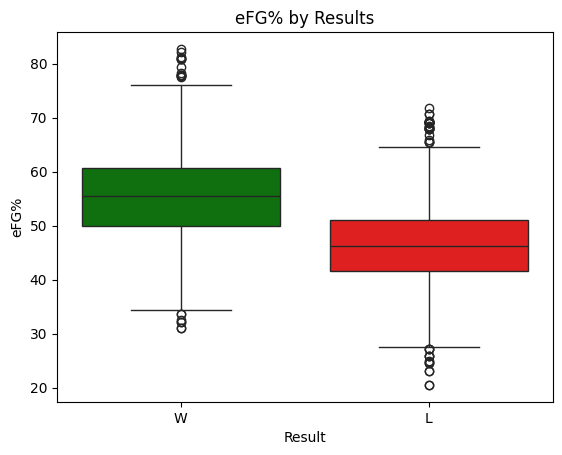

In [ ]:

subset_df=historical_df.sample(n=300,random_state=17)
historical_df['o_eFG%'] = pd.to_numeric(historical_df['o_eFG%'], errors='coerce')
mean_fg=historical_df['o_eFG%'].mean()
won_df = historical_df[historical_df['Won/Loss'] == 'W']
lost_df = historical_df[historical_df['Won/Loss'] == 'L']
won_df.dropna(subset=['o_eFG%'])
lost_df.dropna(subset=['o_eFG%'])
results=stats.ttest_1samp(won_df['o_eFG%'], mean_fg)
results2=stats.ttest_1samp(lost_df['o_eFG%'], mean_fg)
print(f'Statistic: {results[0]}, P-Value: {results[1]}')
print(f'Statistic: {results2[0]}, P-Value: {results2[1]}')
sns.boxplot(x='Won/Loss', y='o_eFG%', data=historical_df,hue='Won/Loss', palette={'W': 'green', 'L': 'red'}, legend=False)
plt.title('eFG% by Results')
plt.xlabel('Result')
plt.ylabel('eFG%')

plt.show()
#display(new_historical_df)

As we can see from this T-Test there is a clear correlation between Offensive effective field goal percentage and the chance of a team winning a game which we can use later in our model to predict whether or not a team will win a game based on their average field goal percentage. Our results also show a P-Value of near 0 showing there is a extremely high correlation between the two. We used the single sample because when using the independent two-sample the p-value was so low it rounded to 0 so we went with 2 single sample instead.
Doing this we know we can reject the null hypothesis and accept the alternative.

**Statistical Test 2-**

Now we will run a chi-square test to see if being home neutral or away really impacts win and losses of games. We have the true advantage according to other data but we should compare with a chi square to see if there is a actual large impact where it is important to factor into our project.\
**H0:** There will be no impact on winning or losing games based on where the games are played.\
**HA:** There will be a statistically signficant impact on winning or losing games based on where the games are played.\
**α:** 0.5

Venue       A    H    N
Won/Loss               
L         368  100  131
W         115  189   97
Chi-Square Statistic: 130.9313209679015
P-Value: 3.703607011976282e-29


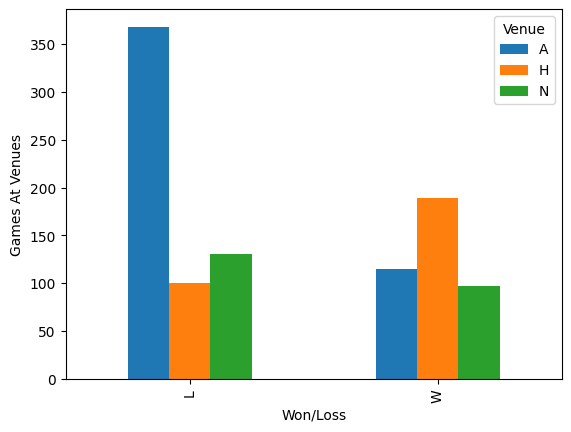

In [ ]:
subset_df=historical_df.sample(n=1000,random_state=17)
contingency_table=pd.crosstab(subset_df['Won/Loss'],subset_df['Venue'])
print(contingency_table)
chi_results=stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi_results[0]}')
print(f'P-Value: {chi_results[1]}')
ax=contingency_table.plot(kind='bar')
ax.set_ylabel('Games At Venues')
plt.show()


From this we can see there is a statistical difference between winning games and the venue these games are held in. However as we can see through our chi squared bar graph there is a significantly higher could of away losses overall than any other game in our data set. This could be skewing our results and is something we definetly should account for moving forward. However due to our low p-value we reject the H0 and ac

**Statistical Test 3-**

Now we will see if having a higher adjusted offensive efficiency or AdjO will lead to a higher score and vice versa with a 2 sample T test.\
**H0:** A higher adjusted offensive efficiency has no impact on having a higher score.\
**HA:** A higher adjusted offensive efficiency has a statistical impact on having a higher score.\
**α=**0.05


Statistic: 13.621963602415581, P-Value: 3.512026207977888e-33


<Axes: xlabel='Adj. O', ylabel='Score'>

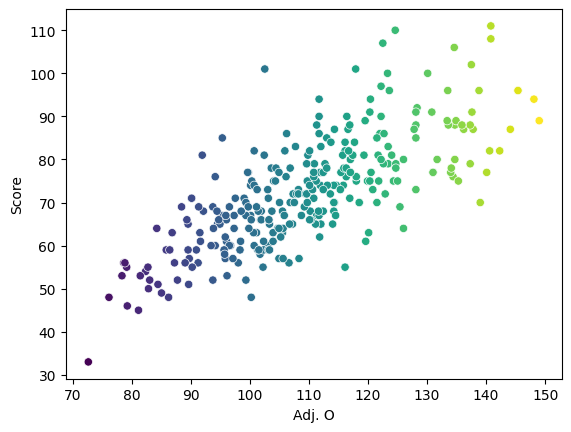

In [ ]:
subset_df=historical_df.sample(n=300,random_state=17)
subset_df['Adj. O'] = pd.to_numeric(subset_df['Adj. O'], errors='coerce')
mean_adjO=subset_df['Adj. O'].mean()
high_adjO=subset_df[subset_df['Adj. O']>mean_adjO]
low_adjO=subset_df[subset_df['Adj. O']<mean_adjO]
results=stats.ttest_ind(high_adjO['Score'],low_adjO['Score'])
print(f'Statistic: {results[0]}, P-Value: {results[1]}')
sns.scatterplot(x='Adj. O', y='Score', data=subset_df,hue='Adj. O', legend=False, palette='viridis')


From the graph and from out p-value we reject the HO and we can say that adjusted offensive efficiency has a statistical impact on having a higher or lower score. So overall we can see generally a higher adjO leads to a higher score.

# Data Preprocessing

# ML Models

# New Section